# Practice 
**Author: Jorge Vázquez Pérez**

In [48]:

""" Uncomment to install packages
%pip install scipy
%pip install numpy
%pip install qiskit
%pip install IPython
%pip install functools"""

import numpy as np
from scipy import sparse
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from IPython.display import display, HTML
from functools import reduce

## Part 1

Here we are going to code the results obtained analytically in the PDF attached. Only necessary explanations will be done here as all the clarifications are done in the PDF.

### Exercise 1: CN and CCN
First, because $a$ and $a^*$ have the form:

\begin{equation}
a= \left[ \begin{array}{cc}
0 & 1 \\
0 & 0 \\
\end{array} \right]
\quad
a^* = \left[ \begin{array}{cc}
0 & 0 \\
1 & 0 \\
\end{array} \right]
\end{equation}

we are going to use the sparse representation, trying to take advantage of the numerous zeros.

In [6]:
a = sparse.csr_matrix(np.array([[0, 1], [0, 0]]))
a_dag = sparse.csr_matrix(np.array([[0, 0], [1, 0]]))

display(array_to_latex(a.toarray(), prefix="a="))
display(array_to_latex(a_dag.toarray(), prefix="a^*="))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
I = sparse.eye(2)

U_CN = sparse.kron(a@a_dag, I) + sparse.kron(a_dag@a, a + a_dag)
display(array_to_latex(U_CN.toarray(), prefix="U_{CN}="))

<IPython.core.display.Latex object>

In [96]:
def kron(*matrices):
    return reduce(sparse.kron, matrices)

U_CCN = kron(a@a_dag, a@a_dag, I) + kron(a@a_dag, a_dag@a, I) + \
    kron(a_dag@a, a@a_dag, I) + kron(a_dag@a, a_dag@a, a + a_dag)
display(array_to_latex(U_CCN.toarray(), prefix="U_{CCN}="))

<IPython.core.display.Latex object>

### Exercise 2: FAN-OUT

In [15]:
U_FO = kron(a@a_dag, a@a_dag) + kron(a_dag@a, (a@a_dag)@(a + a_dag))
display(array_to_latex(U_FO.toarray(), prefix="U_{FO} = "))

<IPython.core.display.Latex object>

### Exercise 3: SWAP

In [21]:
U_SWAP = kron(a@a_dag, a@a_dag) + kron(a_dag@a, a_dag@a) + \
    (kron(a@a_dag, a_dag@a) + kron(a_dag@a, a@a_dag))@kron(a + a_dag, a + a_dag)

display(array_to_latex(U_SWAP.toarray(), prefix="U_{SWAP}="))

<IPython.core.display.Latex object>

### Exercise 4: CSWAP

In [23]:
U_CSWAP = kron(a@a_dag, I, I) + kron(a_dag@a, kron(a@a_dag, a@a_dag) + kron(a_dag@a, a_dag@a)) + \
    kron(a_dag@a, (kron(a@a_dag, a_dag@a) + kron(a_dag@a, a@a_dag))@kron(a + a_dag, a + a_dag))

display(array_to_latex(U_CSWAP.toarray(), prefix="U_{CSWAP}="))

<IPython.core.display.Latex object>

### Exercise 5 and Exercise 6: 

The explanation is in the PDF attached and no code is needed.

## Part 2

First of all, it has to be notice that our work is all with inverted bits. All our theoretical proof revolves around this order and due to lack of time, we cannot put them in the order stated by the Practice, but **the results are totally equivalent** and it will be proven with the comparison with qiskit.

In [40]:
U1_CN = kron(a@a_dag, I, I, I) + kron(a_dag@a, I, a + a_dag, I)
display(array_to_latex(U1_CN.toarray(), max_size=16, prefix="U^{1}_{CN}="))

<IPython.core.display.Latex object>

In [42]:
U2_CN = kron(I, a@a_dag, I, I) + kron(I, a_dag@a, a + a.T, I) 
display(array_to_latex(U2_CN.toarray(), max_size=16, prefix="U^{2}_{CN}="))

<IPython.core.display.Latex object>

In [44]:
U_CCN = kron(a@a_dag, a@a_dag, I, I) + kron(a@a_dag, a_dag@a, I, I) + \
    kron(a_dag@a, a@a_dag, I, I) + kron(a_dag@a, a_dag@a, I, a + a_dag)
display(array_to_latex(U_CCN.toarray(), max_size=16, prefix="U_{CCN}="))

<IPython.core.display.Latex object>

In [45]:
M = U_CCN@U2_CN@U1_CN
display(array_to_latex(M.toarray(), max_size=16, prefix="M="))

<IPython.core.display.Latex object>

In [70]:
ket0 = sparse.csr_matrix(np.array([[1], [0]]))
ket1 = sparse.csr_matrix(np.array([[0], [1]]))

ket0000 = kron(ket0, ket0, ket0, ket0)
ket0001 = kron(ket1, ket0, ket0, ket0)
ket0010 = kron(ket0, ket1, ket0, ket0)
ket0011 = kron(ket1, ket1, ket0, ket0)

classical_inputs = [ket0000, ket0001, ket0010, ket0011]

for i, psi_in in enumerate(classical_inputs):
    psi_out = M@psi_in
    display(Statevector(psi_in.toarray()).draw('latex', prefix=f"\\text{{We have for }} |\Psi_{{in}} \\rangle = "))
    display(Statevector(psi_out.toarray()).draw('latex', prefix=f"|\Psi_{{out}} \\rangle = {array_to_latex(psi_out.toarray(), source=True)} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In this case, because there is no superposition and no complex phase, the vector of probabilities corresponds with the statevector already shown.

In [80]:
ket_super1 = kron(1/np.sqrt(2) * ket0 + 1/np.sqrt(2) * ket1, 1/np.sqrt(2) * ket0 + 1/np.sqrt(2) * ket1, ket0, ket0)
ket_super2 = kron(1/np.sqrt(2) * ket0 - 1j/np.sqrt(2) * ket1, 1/np.sqrt(2) * ket0 + 1/np.sqrt(2) * ket1, ket0, ket0)

superposition_inputs = [ket_super1, ket_super2]

for i, psi_in in enumerate(superposition_inputs):
    psi_out = (M@psi_in).toarray()

    display(Statevector(psi_in.toarray()).draw('latex', prefix=f"\\text{{We have for }} |\Psi_{{in}} \\rangle = "))
    display(Statevector(psi_out).draw('latex', prefix=f"|\Psi_{{out}} \\rangle = {array_to_latex(psi_out, source=True)} = "))
    
    probabilities = np.multiply(np.conj(psi_out), psi_out).T
    display(array_to_latex(probabilities, max_size=16, prefix="\\text{With probabilities: }P = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

And now, lets construct the qiskit circuit to compare.

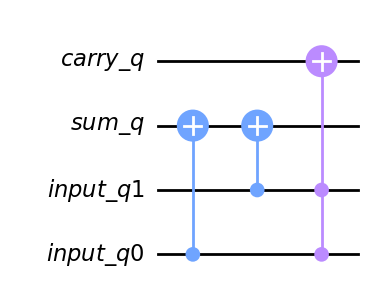

In [86]:
from qiskit import QuantumCircuit, QuantumRegister

# Create a quantum circuit with 4 qubits
carry_q = QuantumRegister(1, name="carry_q")
sum_q = QuantumRegister(1, name="sum_q")
input_q1 = QuantumRegister(1, name="input_q1")
input_q0 = QuantumRegister(1, name="input_q0")

qr_list=[carry_q, sum_q, input_q1, input_q0]
qc = QuantumCircuit(*qr_list)

# Apply the quantum gates according to the quantum half-adder circuit
qc.cx(input_q0, sum_q)    # CNOT gate with q0 as control and sum_q as target
qc.cx(input_q1, sum_q)    # CNOT gate with q1 as control and sum_q as target
qc.ccx(input_q0, input_q1, carry_q)  # Toffoli gate (CCNOT) with q0 and q1 as controls and carry_q as target

semi_adder = qc.to_gate()

# Display the circuit
qc.draw(output='mpl')

In [95]:
from qiskit import QuantumCircuit, BasicAer, transpile

def execute_adder(ket):
    carry_q = QuantumRegister(1, name="carry_q")
    sum_q = QuantumRegister(1, name="sum_q")
    input_q1 = QuantumRegister(1, name="input_q1")
    input_q0 = QuantumRegister(1, name="input_q0")

    qr_list=[carry_q, sum_q, input_q1, input_q0]
    circuit = QuantumCircuit(*qr_list)

    circuit.initialize(Statevector(ket.toarray()))
    circuit.compose(semi_adder, inplace=True)

    backend = BasicAer.get_backend("statevector_simulator")

    tqc = transpile(circuit, backend)
    job = backend.run(tqc)
    result = job.result() 
    return Statevector(result.get_statevector(tqc))

print("For the classical inputs we get:")
for i, psi_in in enumerate(classical_inputs):
    statevector = execute_adder(psi_in)
    display(statevector.draw('latex', prefix=f"|\Psi_{{out}} \\rangle = "))

print("For the superposition inputs we get:")
for i, psi_in in enumerate(superposition_inputs):
    statevector = execute_adder(psi_in)
    display(statevector.draw('latex', prefix=f"|\Psi_{{out}} \\rangle = "))

For the classical inputs we get:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

For the superposition inputs we get:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Obtaining exactly the same results.